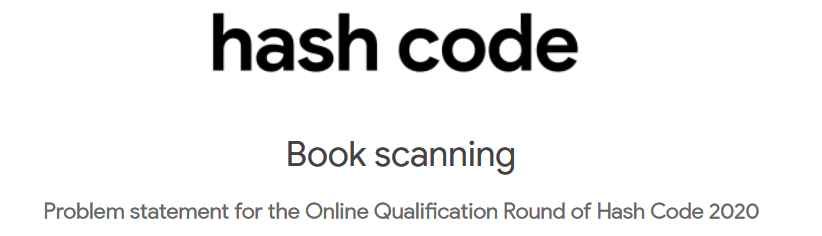

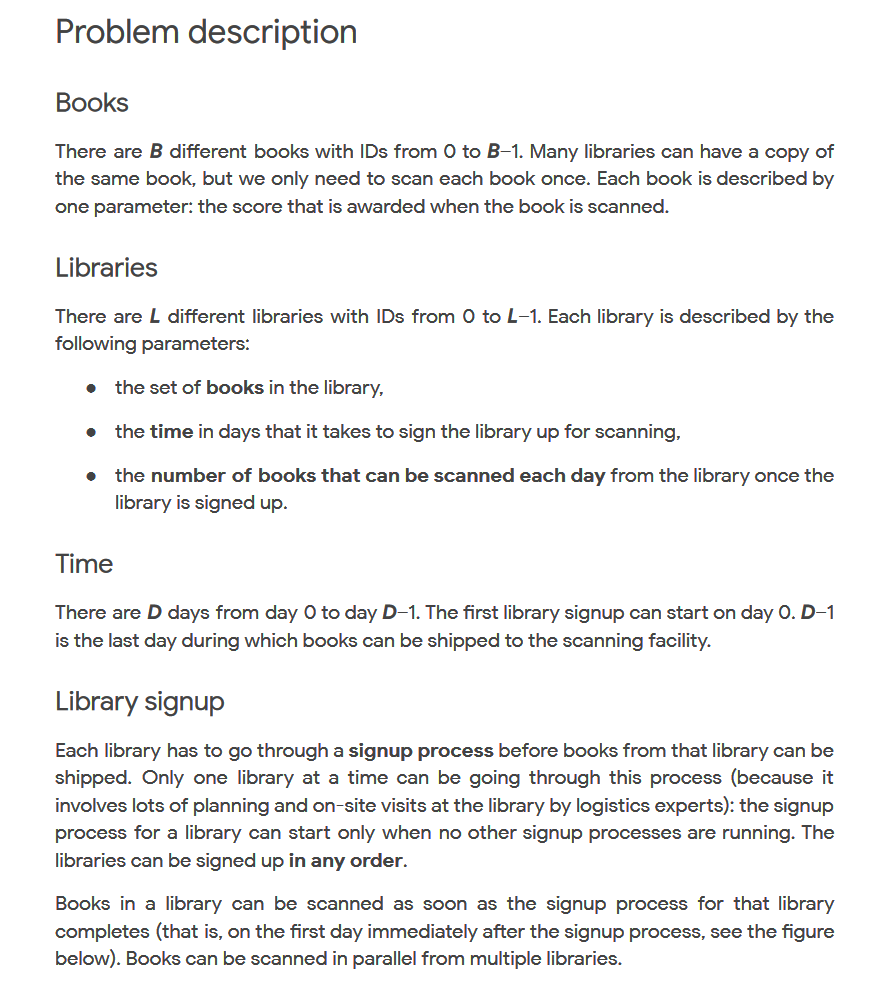

# INPUT FORMAT

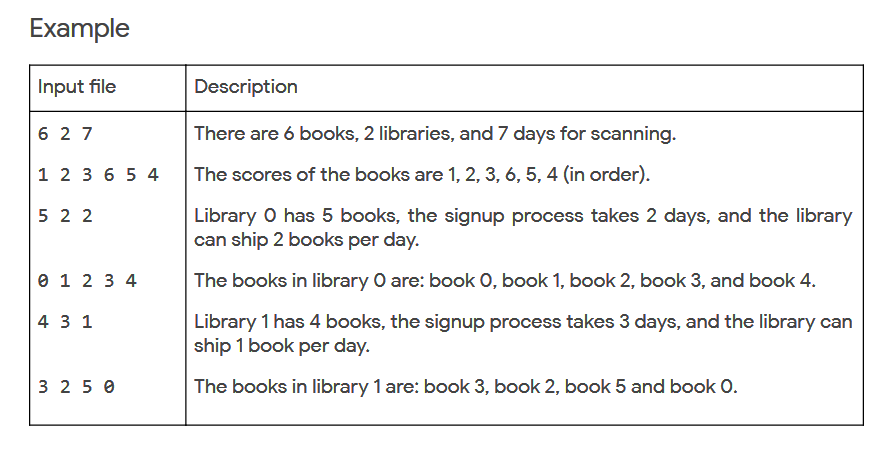

## Apre il file di input in lettura

In [ ]:
File = open("b_read_on.txt","r")
Lines = File.readlines()

## Legge l'istanza

>- Books_score -> chiave = libro, valore = score

>- Library -> chieve = library, valore = ( signup_days, num_of_books, num_of_books_per_day, books ) dove
>> - num_of_books -> numero di libri presenti nella libreria
>> - signup_days -> numero di giorni del signup process della libreria
>> - num_of_books_per_day -> numero massimo di libri che possono essere fotocopiati in un giorno nella libreria
>> - books -> lista di libri presenti nella libreris

In [ ]:
Split_Line = Lines[0].split(" ")

Num_Of_Books = int(Split_Line[0])
Num_Of_Libraries = int(Split_Line[1])
Num_Of_Days = int(Split_Line[2])

Books_score = {}
Split_Line = Lines[1].split(" ")
for i in range(Num_Of_Books) :
    Books_score[i] = int(Split_Line[i])
 
Library = {}

Line_number = 2
for j in range(Num_Of_Libraries) :
    Split_Line = Lines[Line_number].split(" ")
    
    Library[j] = (int(Split_Line[0]), int(Split_Line[1]), int(Split_Line[2]), [] )

    Split_Line = Lines[Line_number + 1].split(" ")
    for p in range(Library[j][0]):
        Library[j][3].append(int(Split_Line[p]))

    Line_number = Line_number + 2


## Euristica Greedy

### Ordina le librerie per numero di signup days crescente

In [ ]:
Library[10]

In [ ]:
Sorted_Num_of_Days = []
for k in Library.keys():
    Sorted_Num_of_Days.append(Library[k][1])
Sorted_Num_of_Days.sort()

Sorted_Library = {}
for i in Sorted_Num_of_Days:
    for k in Library.keys():
        if Library[k][1] == i:
            Sorted_Library[k] = Library[k]
            break
            
Sorted_Library

### Attiva le librarie per numero di signup days crescente
> #### Una volta attivata, una libreria copia i libri che ha a disposizione a partire da quelli con range più alto
>> #### Una volta copiato, un libro viene eliminato dalla lista dei libri da copiare

In [ ]:
Sorted_Num_of_Days = []
for k in Library.keys():
    Sorted_Num_of_Days.append(Library[k][1])
Sorted_Num_of_Days.sort()

Sorted_Library = {}
for i in Sorted_Num_of_Days:
    for k in Library.keys():
        if Library[k][1] == i:
            Sorted_Library[k] = Library[k]
            break


Current_day = 0
Number_of_Scanned_Books = 0
Total_Score = 0
Total_Number_Of_Copied_Books = 0
Scanned_Book = {} # cliave libro, valore libreria

for k in Sorted_Library.keys() :
    Current_day = Current_day + Sorted_Library[k][1]
    if Current_day >= Num_Of_Days :
        break
    
    # ordina i libri della libreria per score crescente
    Library[k][3].sort()
    
    Max_Num_of_Book = (Num_Of_Days - Current_day - 1) * Library[k][2]
    Copied_Book = 0
    
    for b in range(len(Library[k][3])-1, -1, -1): 
        if Library[k][3][b] in Books_score :
            # copia il libro
            Scanned_Book[Library[k][3][b]] = k
            # aggiora lo score
            Total_Score = Total_Score + Books_score[Library[k][3][b]]
            #elimina il libro dalla lista dei libri
            del Books_score[Library[k][3][b]]
            # verifica se ci sono ancora libri da copiare
            Total_Number_Of_Copied_Books = Total_Number_Of_Copied_Books + 1
            Copied_Book = Copied_Book + 1
            if Copied_Book > Max_Num_of_Book :
                break

In [ ]:
File.close()

In [ ]:
Scanned_Book

In [ ]:
Total_Score

In [ ]:
# OUTPUT FORMAT